RFM Model Analysis
Meaning of RFM:
R (Recency): The time interval since the customer's last transaction.
A larger R value means the transaction occurred long ago,
while a smaller R value means the transaction happened recently.

F (Frequency): The number of transactions the customer has made within a certain period.
A larger F value indicates the customer purchases frequently,
while a smaller F value means the customer is less active.

M (Monetary): The total amount of money spent by the customer within a certain period.
A larger M value indicates the customer has higher value,
while a smaller M value suggests a lower customer value.

RFM analysis is a method of segmenting customers based on their activity level and contribution to transaction amounts.
The first step is to construct the RFM table.

##  Data Analysis

In [200]:
# Import necessary libraries
from sklearn.cluster import KMeans      # For K-Means clustering algorithm
import matplotlib.pyplot as plt         # For plotting charts
import seaborn as sns                  # For enhanced chart styling
import pandas as pd                    # For data manipulation and analysis
import numpy as np                     # For scientific computing

# Ignore warning messages
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set plot style
plt.style.use('bmh')  # Options: 'ggplot', 'fivethirtyeight', 'bmh'

# Set pandas display options
pd.set_option('display.max_columns', None)                       # Display all columns
pd.set_option('display.float_format', lambda x: '%.5f' % x)     # Set float display format


In [202]:
data = pd.read_csv('/Users/sinuo/Downloads/retail.csv', encoding = 'ISO-8859-1')
df = data.copy()

In [203]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39000,17850.00000,United Kingdom


# Basic Data Analysis
Basic Information of the Dataset

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [208]:
pip install missingno


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


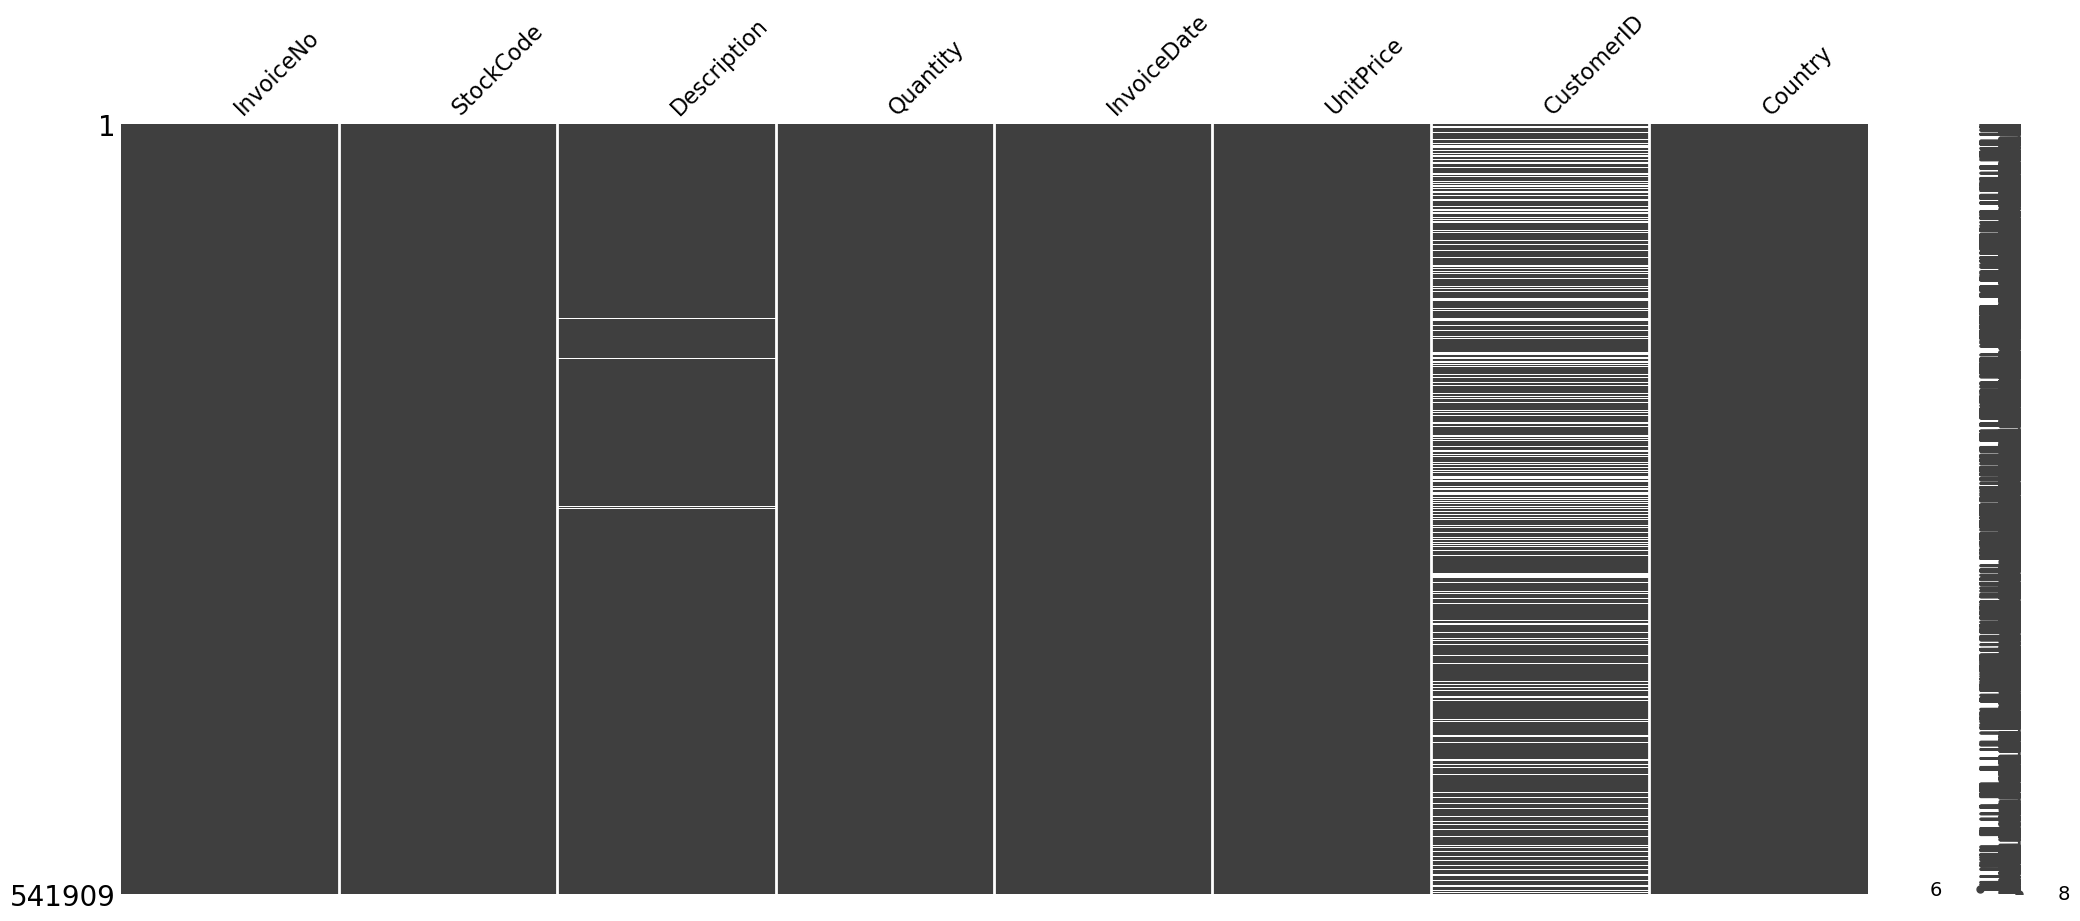

In [210]:
import missingno as msno
msno.matrix(df)
plt.show()

In [211]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)

convert all column names to lowercase:

In [213]:
df.columns = df.columns.str.lower()

In [214]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

find unique countries

In [216]:
df['country'].nunique()

37

#Which are the top 10 countries with the most corresponding rows?

In [218]:
df['country'].value_counts()[:10].index.tolist()

['United Kingdom',
 'Germany',
 'France',
 'EIRE',
 'Spain',
 'Netherlands',
 'Belgium',
 'Switzerland',
 'Portugal',
 'Australia']

TOP5 expensive products

In [221]:
df.sort_values(by='unitprice', ascending=False).head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00000,15098.00000,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75000,16029.00000,United Kingdom
173277,C551685,POST,POSTAGE,-1,5/3/2011 12:51,8142.75000,16029.00000,United Kingdom
173391,C551699,M,Manual,-1,5/3/2011 14:12,6930.00000,16029.00000,United Kingdom
268027,C560372,M,Manual,-1,7/18/2011 12:26,4287.63000,17448.00000,United Kingdom


TOP5 best selling products

In [223]:
df.groupby(["stockcode","description"]).agg({"quantity": lambda x: x.sum()})\
              .rename({'quantity':'total_quantity'},axis=1).nlargest(5,'total_quantity')

,,total_quantity
stockcode,description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
85099B,JUMBO BAG RED RETROSPOT,45066
84879,ASSORTED COLOUR BIRD ORNAMENT,35314
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
21212,PACK OF 72 RETROSPOT CAKE CASES,33409


In [224]:
print(f"Number of unique values in StockCode: {df['stockcode'].nunique()}")
print(f"Number of unique values in Description: {df['description'].nunique()}")


Number of unique values in StockCode: 3684
Number of unique values in Description: 3896


In [225]:
# Drop the remaining missing values
df = df.dropna()

In [227]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
quantity,406829.00000,12.06130,248.69337,-80995.00000,-2.00000,1.00000,1.00000,2.00000,5.00000,12.00000,24.00000,36.00000,120.00000,80995.00000
unitprice,406829.00000,3.46047,69.31516,0.00000,0.21000,0.42000,0.55000,1.25000,1.95000,3.75000,6.75000,8.50000,15.00000,38970.00000
customerid,406829.00000,15287.69057,1713.60030,12346.00000,12415.00000,12626.00000,12876.00000,13953.00000,15152.00000,16791.00000,17719.00000,17905.00000,18212.00000,18287.00000


There are negative values in the Quantity variable, which are caused by refund invoices (invoices containing the letter "C").

In [235]:
df = df[~df["invoiceno"].str.contains("C", na=False)]

In [240]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
quantity,397924.00000,13.02182,180.42021,1.00000,1.00000,1.00000,1.00000,2.00000,6.00000,12.00000,24.00000,36.00000,120.00000,80995.00000
unitprice,397924.00000,3.11617,22.09679,0.00000,0.21000,0.42000,0.55000,1.25000,1.95000,3.75000,6.35000,8.50000,14.95000,8142.75000
customerid,397924.00000,15294.31517,1713.16988,12346.00000,12415.00000,12627.00000,12883.00000,13969.00000,15159.00000,16795.00000,17725.00000,17912.00000,18211.00000,18287.00000


Exclude outliers

In [244]:
df = df.query('quantity>0 and unitprice>0')

change the date and time

In [247]:

df['invoicedate'] = df['invoicedate'].astype(str)

df['invoicedate'] = pd.to_datetime(df['invoicedate'].str.split(' ', expand=True)[0])


In [249]:
# Add fields for grouping
df['year'] = df.invoicedate.dt.year
df['month'] = df.invoicedate.dt.month
df['months'] = df.year.astype(str) + '-' + df.month.astype(str)
df['totalcost'] =  df['unitprice'] * df['quantity']

In [250]:
df.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid            float64
country                object
year                    int64
month                   int64
months                 object
totalcost             float64
dtype: object

In [253]:
df['customerid'] = df['customerid'].astype(int)

## RFM

### 1.1.1. RFM Calculation

In [257]:
# Create the RFM table by using pivot_table to transform the DataFrame
rfm = df.pivot_table(
    index='customerid',  # Set 'customerid' as the index of the pivot table; each row corresponds to one customer
    values=["invoiceno", "totalcost", "invoicedate"],  # Columns to be aggregated
    aggfunc={
        "invoiceno": pd.Series.nunique,  # Use pd.Series.nunique to calculate the number of unique invoices for each customer
        "totalcost": "sum",              # Use 'sum' to calculate the total spending of each customer
        "invoicedate": "max"             # Use 'max' to find the most recent purchase date for each customer
    }
)

In [258]:
# Use the latest transaction date among all users as the reference point.
# The time interval between each customer's last transaction and this reference date is Recency (R).
rfm['Recency'] = (rfm.invoicedate.max() - rfm.invoicedate) / np.timedelta64(1, 'D')

# The total number of invoices for each customer is Frequency (F),
# and the total spending is Monetary (M).
rfm.rename(columns={
        "invoiceno": "Frequency",
        "totalcost": "Monetary"
    }, inplace=True)

rfm.head()

,invoicedate,Frequency,Monetary,Recency
customerid,,,,
12346,2011-01-18,1,77183.60000,325.00000
12347,2011-12-07,7,4310.00000,2.00000
12348,2011-09-25,4,1797.24000,75.00000
12349,2011-11-21,1,1757.55000,18.00000
12350,2011-02-02,1,334.40000,310.00000


如最近在做用户调研，根据用户的打分，将用户进行归类，在实际操作中，将用户归为三类（0-6一类，7-8一类等）

接着对客户价值进行标注，将客户分为8个等级。

![](https://image.woshipm.com/wp-files/2023/03/IT8NGS7FM3p418AgHzgh.png)


In [262]:
# Standardize RFM columns using z-score
rfm_standardized = rfm[['Recency', 'Frequency', 'Monetary']].apply(lambda x: (x - x.mean()) / x.std())

# Define RFM classification function
def rfm_func(x):
    level = x.apply(lambda x: '1' if x > 0 else '0')
    level = level.Recency + level.Frequency + level.Monetary
    d = {
        "011": "Important Value Customer",
        "111": "Important Loyal Customer",
        "001": "Important To Retain Customer",
        "101": "Important To Develop Customer",
        "110": "General Value Customer",
        "010": "General Loyal Customer",
        "100": "General To Retain Customer",
        "000": "General To Develop Customer"
    }
    return d[level]

# Apply the classification to each row
rfm['label'] = rfm_standardized.apply(rfm_func, axis=1)

rfm.head()


,invoicedate,Frequency,Monetary,Recency,label
customerid,,,,,
12346,2011-01-18,1,77183.60000,325.00000,Important To Develop Customer
12347,2011-12-07,7,4310.00000,2.00000,Important Value Customer
12348,2011-09-25,4,1797.24000,75.00000,General To Develop Customer
12349,2011-11-21,1,1757.55000,18.00000,General To Develop Customer
12350,2011-02-02,1,334.40000,310.00000,General To Retain Customer


对重要价值客户和非重要价值客户进行可视化展示

In [265]:
rfm.label.unique()

array(['Important To Develop Customer', 'Important Value Customer',
       'General To Develop Customer', 'General To Retain Customer',
       'Important To Retain Customer', 'General Loyal Customer',
       'General Value Customer', 'Important Loyal Customer'], dtype=object)

### Visualization

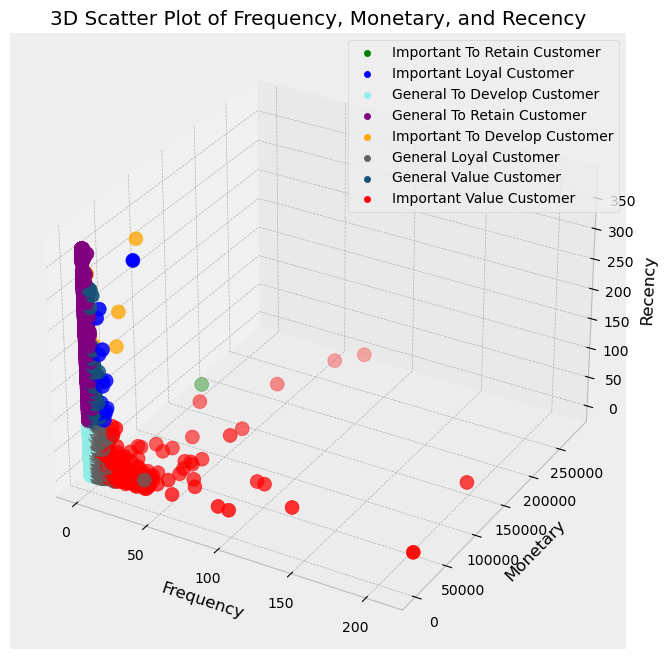

In [268]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

df = rfm.copy()

# Define colors for each "label"
colors = {
    'Important To Retain Customer': 'green',
    'Important Loyal Customer': 'blue',
    'General To Develop Customer': '#91eee7',
    'General To Retain Customer': 'purple',
    'Important To Develop Customer': 'orange',
    'General Loyal Customer': '#616161',
    'General Value Customer': '#165376',
    'Important Value Customer': 'red',
}

# Check if all labels in the DataFrame have corresponding colors
invalid_labels = set(df['label'].unique()) - set(colors.keys())
if invalid_labels:
    raise ValueError(f"The following labels do not have corresponding colors: {invalid_labels}")

# Plot the 3D scatter plot
scatter = ax.scatter(
    df['Frequency'],
    df['Monetary'],
    df['Recency'],
    c=df['label'].map(colors),  # Map label to color
    s=100                      # Size of points
)

# Set axis labels
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')

# Add legend entries (using empty points)
for label, color in colors.items():
    ax.scatter([], [], [], c=color, label=label)

# Add legend to the plot
ax.legend()

# Set plot title
plt.title('3D Scatter Plot of Frequency, Monetary, and Recency')

# Display the plot
plt.show()


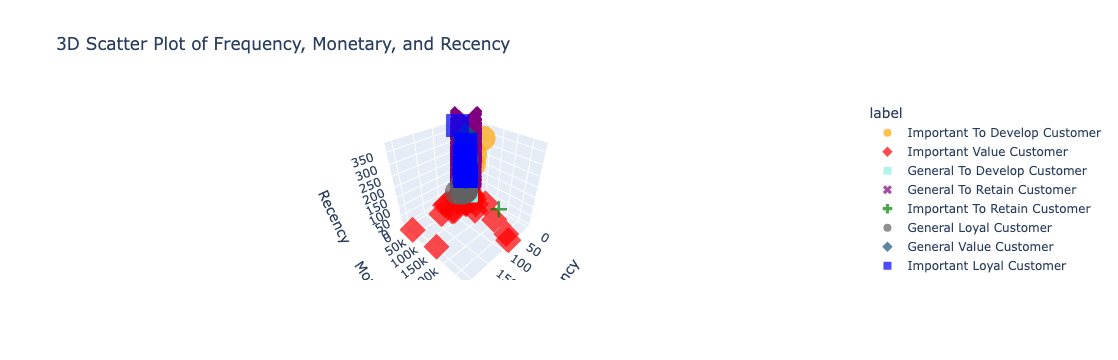

In [270]:
import plotly.express as px
import pandas as pd

# Your DataFrame
df = rfm.copy()

# Define color mapping for customer labels
colors = {
    'Important To Retain Customer': 'green',
    'Important Loyal Customer': 'blue',
    'General To Develop Customer': '#91eee7',
    'General To Retain Customer': 'purple',
    'Important To Develop Customer': 'orange',
    'General Loyal Customer': '#616161',
    'General Value Customer': '#165376',
    'Important Value Customer': 'red',
}

# Check if all labels in the DataFrame have corresponding colors
invalid_labels = set(df['label'].unique()) - set(colors.keys())
if invalid_labels:
    raise ValueError(f"The following labels do not have corresponding colors: {invalid_labels}")

# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x='Frequency',
    y='Monetary',
    z='Recency',
    color='label',
    color_discrete_map=colors,
    symbol='label',
    size_max=2,
    opacity=0.7,
    labels={
        'Frequency': 'Frequency',
        'Monetary': 'Monetary',
        'Recency': 'Recency'
    },
    title='3D Scatter Plot of Frequency, Monetary, and Recency'
)

# Display the plot
fig.show()


### K-Means

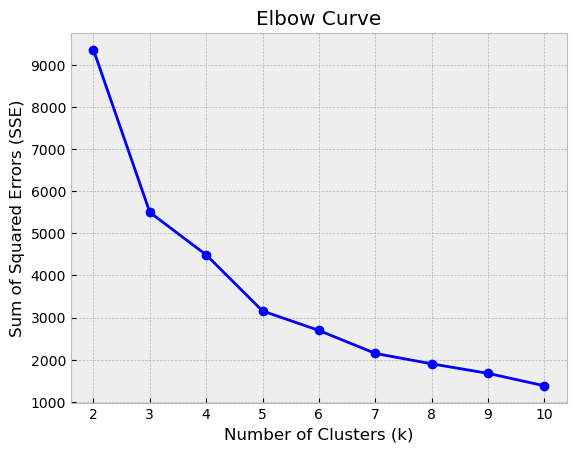

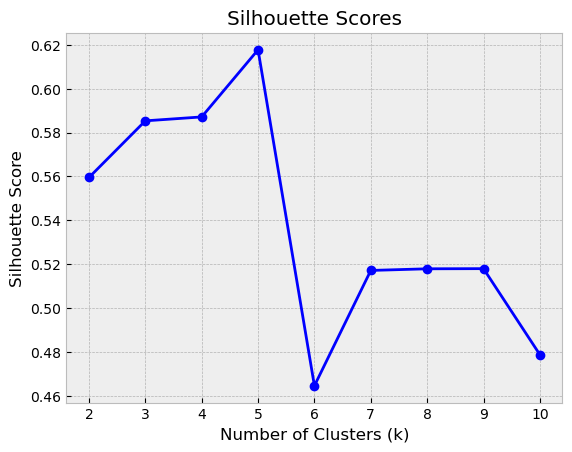

In [274]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

rfm_segmentation = rfm[['Recency','Frequency','Monetary']].copy()

# Determine the optimal value of k using the elbow method
sse = []
silhouette_scores = []
k_values = range(2, 11)

X = rfm_segmentation.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=1, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


# kmeans++
#for k in k_values:
#    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
#    kmeans.fit(X)


# Plot the elbow curve
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

By identifying different customer groups through RFM analysis, businesses can measure customer value and profit-generating potential. This enables personalized communication and marketing services, providing strong support for more effective marketing decisions and creating greater benefits for the company.

In [276]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['kmeans_cluster'] = kmeans.labels_

#check our hypothesis
rfm_segmentation[rfm_segmentation.kmeans_cluster == 0].head(10)

,Recency,Frequency,Monetary,kmeans_cluster
customerid,,,,
12347,2.00000,7,4310.00000,0
12348,75.00000,4,1797.24000,0
12349,18.00000,1,1757.55000,0
12350,310.00000,1,334.40000,0
12352,36.00000,8,2506.04000,0
12353,204.00000,1,89.00000,0
12354,232.00000,1,1079.40000,0
12355,214.00000,1,459.40000,0
12356,22.00000,3,2811.43000,0


In [277]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = rfm[['Recency','Frequency','Monetary']].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(X_scaled)

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

# Print the number of clusters and noise points
print('Estimated number of clusters:', n_clusters)
print('Estimated number of noise points:', n_noise)

Estimated number of clusters: 3
Estimated number of noise points: 162


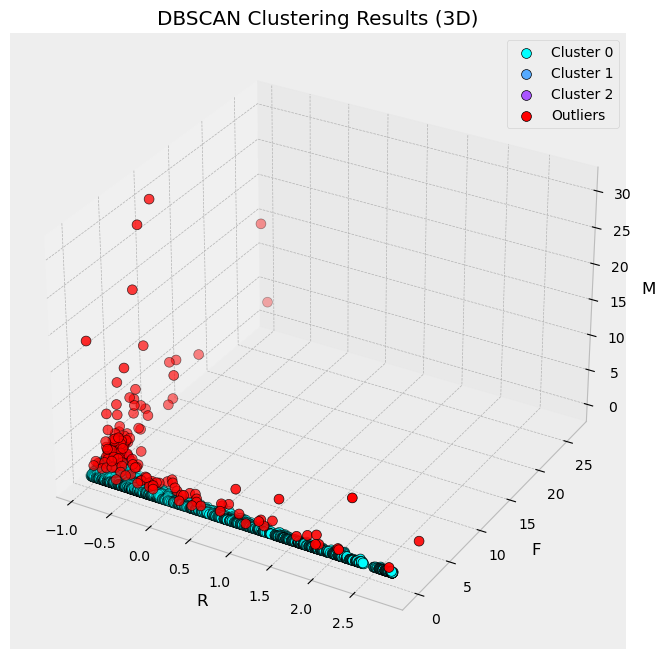

In [278]:
# Custom color map
custom_cmap = plt.cm.get_cmap('cool', len(set(clusters)))

# Visualize the clusters in 3D with custom colors
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting clusters with legend
for cluster_label in set(clusters):
    if cluster_label == -1:
        # Plot outliers separately
        ax.scatter(
            X_scaled[clusters == cluster_label, 0],
            X_scaled[clusters == cluster_label, 1],
            X_scaled[clusters == cluster_label, 2],
            c='red',
            label='Outliers',
            marker='o',
            edgecolors='k',
            s=50
        )
    else:
        ax.scatter(
            X_scaled[clusters == cluster_label, 0],
            X_scaled[clusters == cluster_label, 1],
            X_scaled[clusters == cluster_label, 2],
            c=[custom_cmap(cluster_label)],
            label=f'Cluster {cluster_label}',
            marker='o',
            edgecolors='k',
            s=50
        )

ax.set_title('DBSCAN Clustering Results (3D)')
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

# Add legend
ax.legend()

plt.show()


In [279]:
rfm_segmentation['DBSCAN_cluster'] = clusters

In [280]:
rfm_segmentation

,Recency,Frequency,Monetary,kmeans_cluster,DBSCAN_cluster
customerid,,,,,
12346,325.00000,1,77183.60000,1,-1
12347,2.00000,7,4310.00000,0,0
12348,75.00000,4,1797.24000,0,0
12349,18.00000,1,1757.55000,0,0
12350,310.00000,1,334.40000,0,0
...,...,...,...,...,...
18280,277.00000,1,180.60000,0,0
18281,180.00000,1,80.82000,0,0
18282,7.00000,2,178.05000,0,0


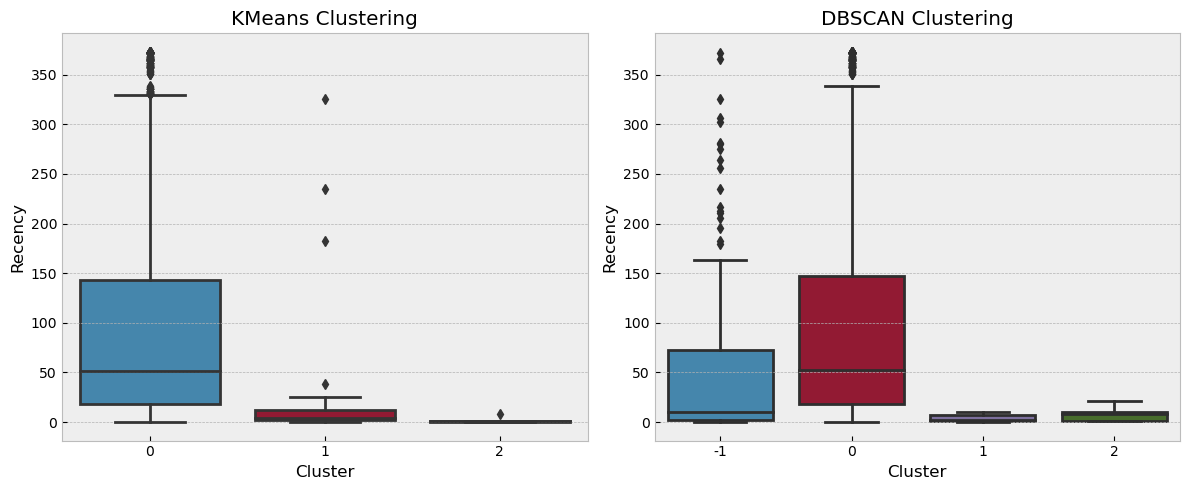

In [281]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Boxplot for KMeans clusters
sns.boxplot(x=rfm_segmentation['kmeans_cluster'], y=rfm_segmentation['Recency'], ax=axes[0])
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Recency')

# Subplot 2: Boxplot for DBSCAN clusters
sns.boxplot(x=rfm_segmentation['DBSCAN_cluster'], y=rfm_segmentation['Recency'], ax=axes[1])
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Recency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

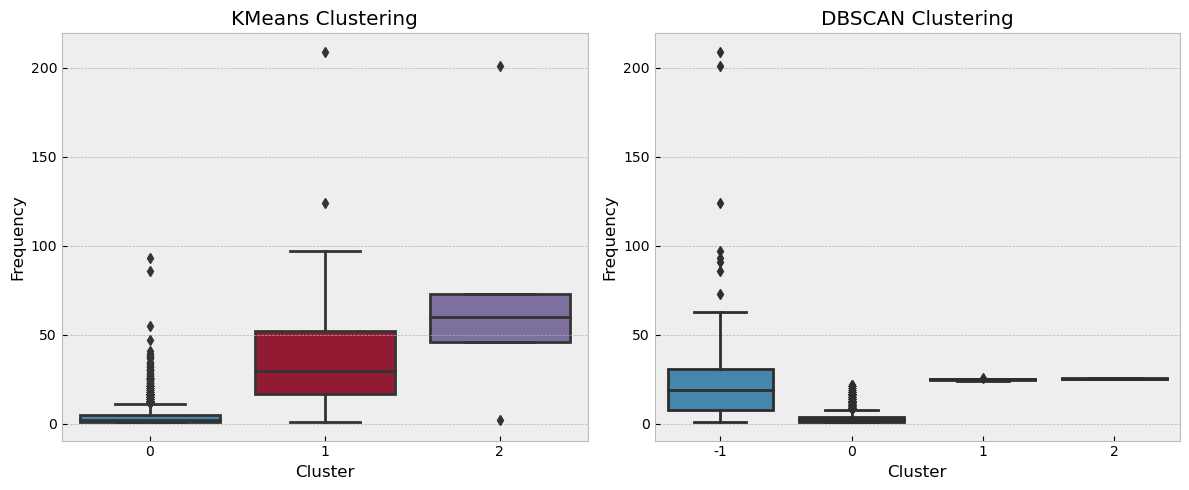

In [282]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Boxplot for KMeans clusters
sns.boxplot(x=rfm_segmentation['kmeans_cluster'], y=rfm_segmentation['Frequency'], ax=axes[0])
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Frequency')

# Subplot 2: Boxplot for DBSCAN clusters
sns.boxplot(x=rfm_segmentation['DBSCAN_cluster'], y=rfm_segmentation['Frequency'], ax=axes[1])
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

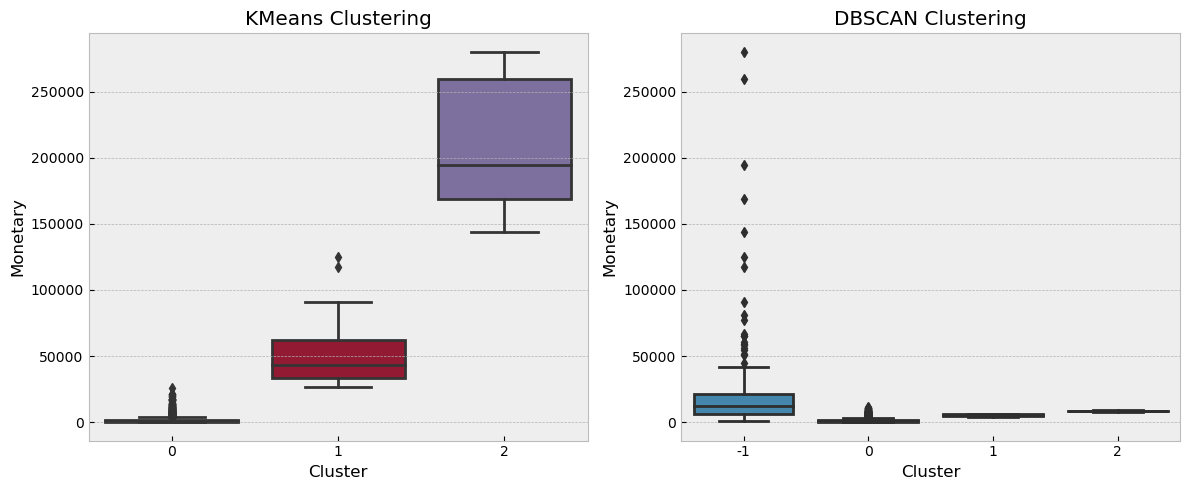

In [283]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Boxplot for KMeans clusters
sns.boxplot(x=rfm_segmentation['kmeans_cluster'], y=rfm_segmentation['Monetary'], ax=axes[0])
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Monetary')

# Subplot 2: Boxplot for DBSCAN clusters
sns.boxplot(x=rfm_segmentation['DBSCAN_cluster'], y=rfm_segmentation['Monetary'], ax=axes[1])
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Monetary')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###  detailed breakdown

In [294]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [296]:
'''
quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25%
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75%
values.
'''
quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,Frequency,Monetary,Recency
0.25000,1.00000,307.41500,17.00000
0.50000,2.00000,674.48500,50.00000
0.75000,5.00000,1661.74000,141.75000


In [298]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [300]:
#calculate RFM score..

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,kmeans_cluster,DBSCAN_cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
customerid,,,,,,,,,
12346,325.00000,1,77183.60000,1,-1,4,4,1,441
12347,2.00000,7,4310.00000,0,0,1,1,1,111
12348,75.00000,4,1797.24000,0,0,3,2,1,321
12349,18.00000,1,1757.55000,0,0,2,4,1,241
12350,310.00000,1,334.40000,0,0,4,4,3,443


In [302]:
'''
Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score
between 3 and 12. Here the advantage is that each of the scores got same importance. However some scores
will have many segments as constituents (eg - 413 ad 431)
'''

rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + \
rfm_segmentation['M_Quartile']

In [304]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,kmeans_cluster,DBSCAN_cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
customerid,,,,,,,,,,
12346,325.00000,1,77183.60000,1,-1,4,4,1,441,9
12347,2.00000,7,4310.00000,0,0,1,1,1,111,3
12348,75.00000,4,1797.24000,0,0,3,2,1,321,6
12349,18.00000,1,1757.55000,0,0,2,4,1,241,7
12350,310.00000,1,334.40000,0,0,4,4,3,443,11


In [306]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  456
Loyal Customers:  872
Big Spenders:  1085
Almost Lost:  34
Lost Customers:  208
Lost Cheap Customers:  444


In [308]:
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,kmeans_cluster,DBSCAN_cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
customerid,,,,,,,,,,
14646,1.00000,73,280206.02000,2,-1,1,1,1,111,3
18102,0.00000,60,259657.30000,2,-1,1,1,1,111,3
17450,8.00000,46,194550.79000,2,-1,1,1,1,111,3
14911,1.00000,201,143825.06000,2,-1,1,1,1,111,3
14156,9.00000,55,117379.63000,1,-1,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...,...
17102,261.00000,1,25.50000,0,0,4,4,4,444,12
15823,372.00000,1,15.00000,0,0,4,4,4,444,12
17763,263.00000,1,15.00000,0,0,4,4,4,444,12


In [310]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean()

RFMScore
111   9547.54000
112   1286.33127
113    511.27000
114    253.92000
121   2910.55886
         ...    
434    214.62952
441   8910.26727
442    994.80000
443    415.12685
444    165.20604
Name: Monetary, Length: 61, dtype: float64

In [312]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean()

Total_score
3    9547.54000
4    4164.12704
5    2431.43759
6    1456.71865
7    1201.25163
8     782.68758
9     717.96994
10    384.77030
11    288.07245
12    165.20604
Name: Monetary, dtype: float64

<AxesSubplot:xlabel='Total_score'>

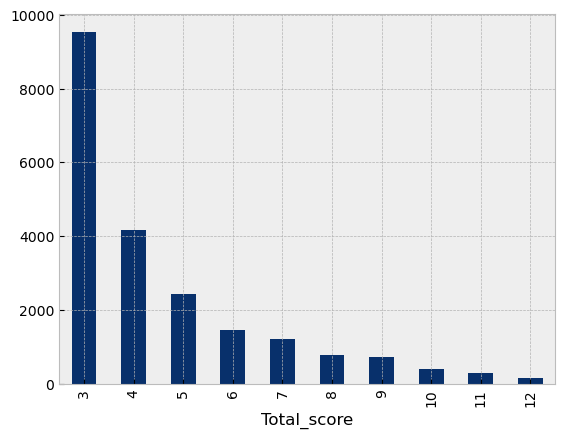

In [314]:
'''
Based on Monetary we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total_score'>

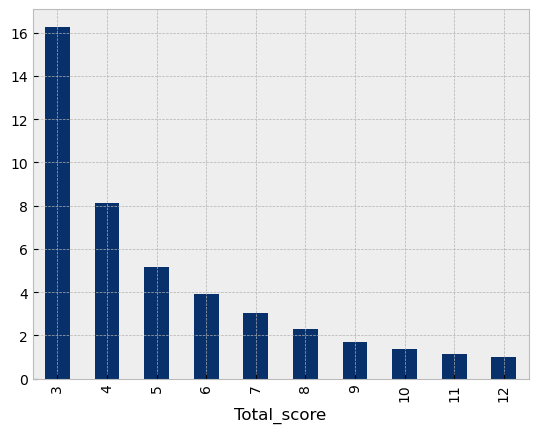

In [316]:
'''
Based on Frequncy we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total_score'>

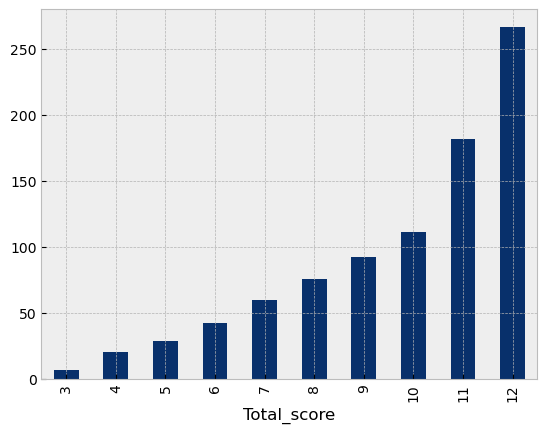

In [317]:
'''
Based on Recency we see Total_score 10,11,12 have highest value which is good for model. because it could have
combination of values such as 444, 434, 334 etc.
'''

rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')

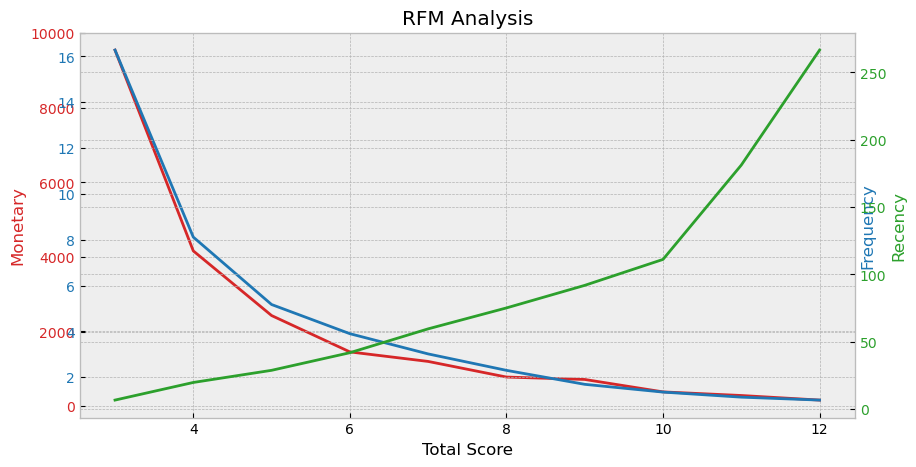

In [320]:
m = rfm_segmentation.groupby('Total_score')['Monetary'].mean()
f = rfm_segmentation.groupby('Total_score')['Frequency'].mean()
r = rfm_segmentation.groupby('Total_score')['Recency'].mean()

plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize = [10,5])

color = 'tab:red'
ax1.plot(m.index, m.values,color=color)
ax1.set_title('RFM Analysis')
ax1.set_xlabel('Total Score')
ax1.set_ylabel('Monetary', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(f.index, f.values,color=color)
ax2.set_ylabel('Frequency', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()

color = 'tab:green'
ax3.plot(r.index, r.values,color=color)
ax3.set_ylabel('Recency', color=color)
ax3.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()